<a href="https://colab.research.google.com/github/ohudBukhari/Training-task/blob/main/training_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyhdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.4/771.4 kB 5.6 MB/s eta 0:00:00


In [3]:
from google.colab import drive
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.6.0
    Uninstalling pyproj-3.6.0:
      Successfully uninstalled pyproj-3.6.0


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pyhdf.SD import SD, SDC

In [5]:
FILE_NAME = '/content/AIRS.2002.08.01.L3.RetStd_H031.v4.0.21.0.G06104133732.hdf'
hdf = SD(FILE_NAME, SDC.READ)

print(hdf.datasets())

DATAFIELD_NAME='RelHumid_A'
data3D = hdf.select(DATAFIELD_NAME)
data = data3D[11,:,:]

lat = hdf.select('Latitude')
latitude = lat[:,:]
lon = hdf.select('Longitude')
longitude = lon[:,:]

{'TotalCounts_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 0), 'TotCldLiqH2O_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 1), 'TotCldLiqH2O_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 2), 'TotCldLiqH2O_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 3), 'TotH2OVap_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 4), 'TotH2OVap_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 5), 'TotH2OVap_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 6), 'TotO3_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 7), 'TotO3_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 8), 'TotO3_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 9), 'SurfAirTemp_A': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 10), 'SurfAirTemp_A_ct': (('YDim:ascending', 'XDim:ascending'), (180, 360), 22, 11), 'SurfAirTemp_A_sdev': (('YDim:ascending', 'XDim:ascending'), (180, 360), 5, 12), 'Surf

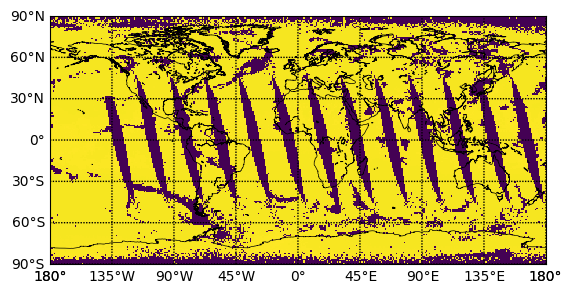

In [6]:
from mpl_toolkits.basemap import pyproj
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
m = Basemap(projection='cyl', resolution='l', llcrnrlat=-90, urcrnrlat = 90, llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90., 120., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180., 181., 45.), labels=[0, 0, 0, 1])
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data)

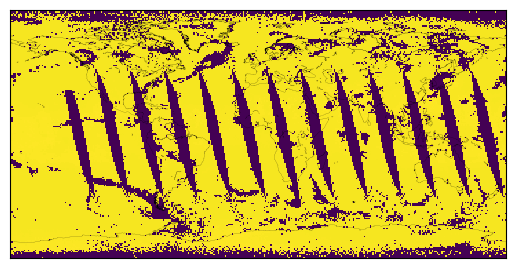

In [7]:
m = Basemap(projection='cyl', resolution='l', llcrnrlat=-90, urcrnrlat = 90, llcrnrlon=-180, urcrnrlon = 180)
m.drawcoastlines(linewidth=0.1)
x, y = m(longitude, latitude)
m.pcolormesh(x, y, data)

In [8]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [9]:
from google.colab import files
from IPython.display import Image
Image('/content/AIRS1.png')
data=plt.imread('AIRS1.png')
print('Data shape:',data.shape)
print('Data type:',type(data))

Data shape: (268, 515, 4)
Data type: <class 'numpy.ndarray'>


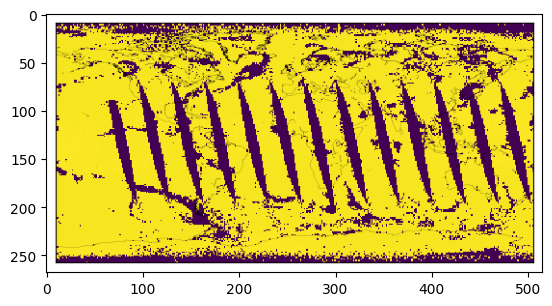

In [10]:
plt.imshow(data)
plt.show()

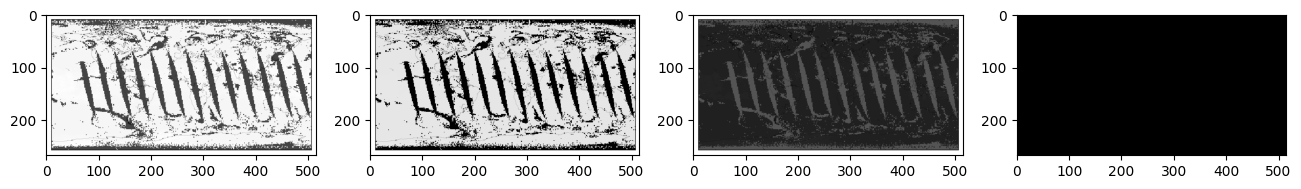

In [11]:
fig,axes=plt.subplots(1,data.shape[2],figsize=(16,8),facecolor='w')
for ch in range(data.shape[2]):
    axes[ch].imshow(data[:,:,ch],cmap='gray')
plt.show()

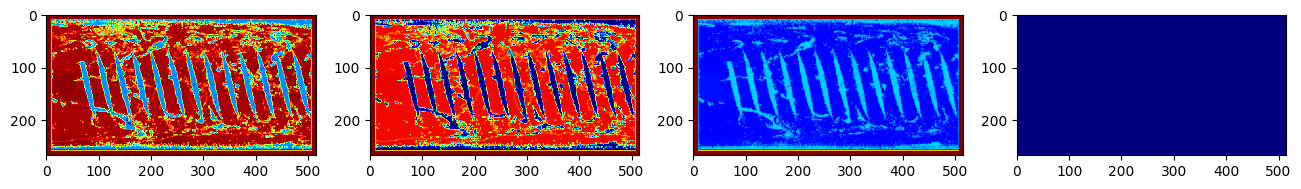

In [12]:
fig,axes=plt.subplots(1,data.shape[2],figsize=(16,8),facecolor='w')
for ch in range(data.shape[2]):
    axes[ch].imshow(data[:,:,ch],cmap='jet')
plt.show()

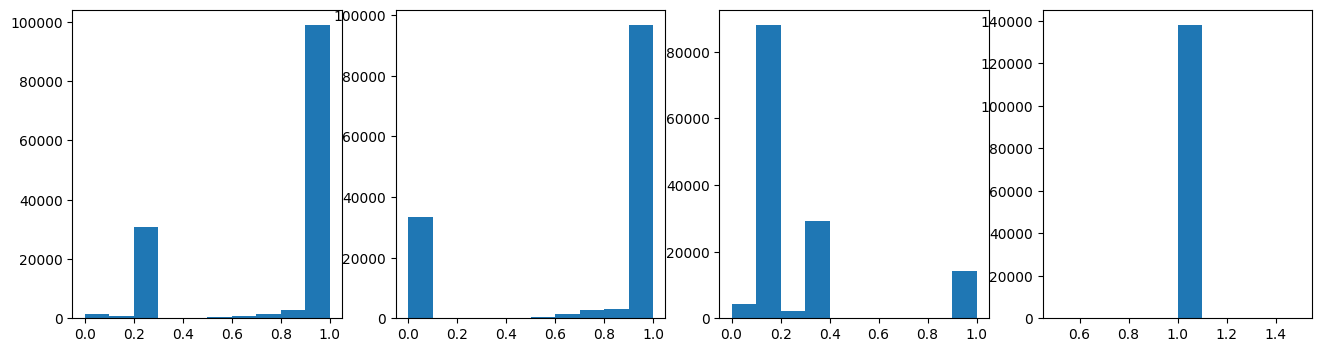

In [13]:
# list comprehension to make an array of 1D array data
data1d = [data[:,:,ch].reshape(-1) for ch in range(data.shape[2])]
# histogram values
fig,axes=plt.subplots(1,len(data1d),figsize=(16,4),facecolor='w')
for index,ch_data in enumerate(data1d):
    axes[index].hist(ch_data)
plt.show()

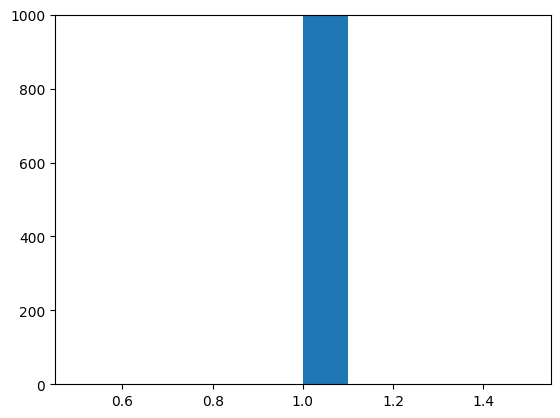

In [14]:
plt.hist(data1d[-1])
plt.ylim(0,1000)
plt.show()

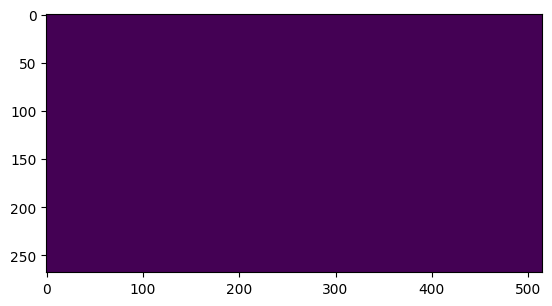

In [20]:
where = ((data[:,:,-1] > 0.) & (data[:,:,-1] < 1.)).astype(np.int32)
plt.imshow(where)

In [21]:
print(where.shape)

(268, 515)


In [22]:
where_sparse = np.where(where>0)
print('2D coordinates:',np.shape(where_sparse))

2D coordinates: (2, 0)


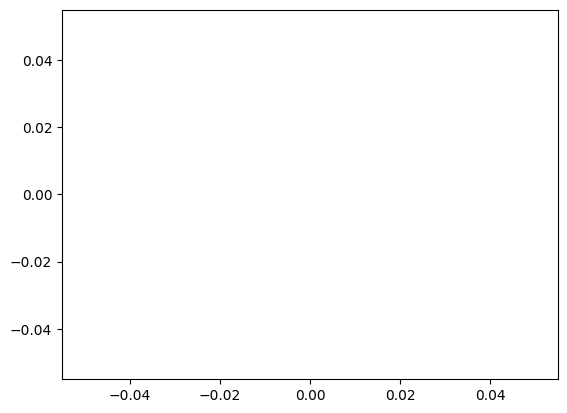

In [23]:
plt.plot(where_sparse[0],where_sparse[1])
plt.show()

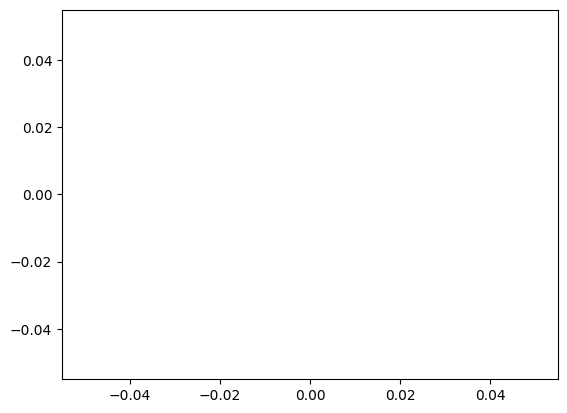

In [24]:
plt.plot(where_sparse[0],where_sparse[1],marker="o",markersize=6,linestyle='')
plt.show()

In [28]:
batch_data  = np.array([data for _ in range(128)])
batch_index = np.array(range(128))
print('data size:',batch_data.size*4/1.e6,'[MB]')

data size: 282.66496 [MB]


In [29]:
import os

In [30]:
# Numpy file w/o compression
t0=time.time()
np.savez('example.npz',data=batch_data,index=batch_index)
print('Numpy w/o comp.:',time.time()-t0,'[s] ... size',os.path.getsize('example.npz')/1.e6,'MB')
# Numpy file w/ compression
t0=time.time()
np.savez_compressed('example_compressed.npz',data=batch_data,index=batch_index)
print('Numpy w/  comp.:',time.time()-t0,'[s] ... size',os.path.getsize('example_compressed.npz')/1.e6,'MB')
# H5 file w/o compression
import h5py as h5
f=h5.File('example.h5','w')
t0=time.time()
f.create_dataset('data',data=batch_data)
f.create_dataset('index',data=batch_index)
f.close()
print('HDF5  w/o comp.:',time.time()-t0,'[s] ... size',os.path.getsize('example.h5')/1.e6,'MB')
# H5 file w/ compression
f=h5.File('example_compressed.h5','w')
t0=time.time()
f.create_dataset('data',data=batch_data, chunks=True, compression='gzip')
f.create_dataset('index',data=batch_index, chunks=batch_index.shape, compression='gzip')
f.close()
print('HDF5  w/  comp.:',time.time()-t0,'[s] ... size',os.path.getsize('example_compressed.h5')/1.e6,'MB')

Numpy w/o comp.: 2.518038511276245 [s] ... size 282.666488 MB
Numpy w/  comp.: 4.632706165313721 [s] ... size 9.773141 MB
HDF5  w/o comp.: 0.9975748062133789 [s] ... size 282.668032 MB
HDF5  w/  comp.: 2.6529672145843506 [s] ... size 7.993162 MB


In [31]:
# Numpy file w/o compression
t0=time.time()
d=np.load('example.npz')
print('Numpy w/o comp.: first entry sum =',d['data'][0].sum(),time.time()-t0,'[s]')
# Numpy file w/  compression
t0=time.time()
d=np.load('example_compressed.npz')
print('Numpy w/  comp.: first entry sum =',d['data'][0].sum(),time.time()-t0,'[s]')
# H5 file w/o compression
t0=time.time()
f=h5.File('example.h5','r')
print('HDF5  w/o comp.: first entry sum =',f['data'][0].sum(),time.time()-t0,'[s]')
f.close()
# H5 file w/  compression
t0=time.time()
f=h5.File('example_compressed.h5','r')
print('HDF5  w/  comp.: first entry sum =',f['data'][0].sum(),time.time()-t0,'[s]')
f.close()

Numpy w/o comp.: first entry sum = 377238.0 0.507134199142456 [s]
Numpy w/  comp.: first entry sum = 377238.0 0.7407684326171875 [s]
HDF5  w/o comp.: first entry sum = 377238.0 0.002550840377807617 [s]
HDF5  w/  comp.: first entry sum = 377238.0 0.03865838050842285 [s]


In [32]:
# H5 file w/ compression
f=h5.File('example_smart_compressed.h5','w')
t0=time.time()
f.create_dataset('data',data=batch_data, chunks=tuple([1]+list(data.shape)), compression='gzip')
f.create_dataset('index',data=batch_index, chunks=batch_index.shape, compression='gzip')
f.close()
print('HDF5  w/  comp.:',time.time()-t0,'[s] ... size',os.path.getsize('example_smart_compressed.h5')/1.e6,'MB')

HDF5  w/  comp.: 2.2643821239471436 [s] ... size 12.197931 MB


In [33]:
# H5 file w/  compression
t0=time.time()
f=h5.File('example_smart_compressed.h5','r')
print('HDF5  w/  comp.: first entry sum =',f['data'][0].sum(),time.time()-t0,'[s]')
f.close()

HDF5  w/  comp.: first entry sum = 377238.0 0.020679712295532227 [s]
